# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#https://stackoverflow.com/questions/48908772/read-csv-with-pandas-from-subdirectory-on-windows-and-unix
from pathlib import Path
root = Path()
root

PosixPath('.')

In [3]:
project_data = pd.read_csv(root / 'train_data.csv')
resource_data = pd.read_csv(root / 'resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
project_data.head()
project_data= project_data.iloc[:74999,]
is_approved=project_data.pop('project_is_approved')
print(project_data.shape)

(74999, 16)


In [8]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( project_data, is_approved, test_size=0.15, random_state=42, stratify=is_approved)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63749, 16)
(11250, 16)
(63749,)
(11250,)


In [10]:
#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)

In [11]:
print("Train shape")
print(X_train.shape)
print(y_train.shape)
print("-"*75)
print("Test shape")
print(X_test.shape)
print(y_test.shape)
print("-"*75)
print("Cross Validation shape")
print(X_val.shape)
print(y_val.shape)

Train shape
(54186, 16)
(54186,)
---------------------------------------------------------------------------
Test shape
(11250, 16)
(11250,)
---------------------------------------------------------------------------
Cross Validation shape
(9563, 16)
(9563,)


## 2.2.1 Preprocessing of Category

## 2.2.1.1 Preprocessing of Category for Train

In [12]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.2 Preprocessing of Category for Cross Validation

In [13]:
catogories = list(X_val['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_val['clean_categories'] = cat_list
X_val.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_val['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.3 Preprocessing of Category for Test

In [14]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.3 preprocessing of `project_subject_subcategories` for Train

In [15]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 2.1.2.1 preprocessing of `project_subject_subcategories` for Test

In [16]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 2.1.2.1 preprocessing of `project_subject_subcategories` for Cross Validation

In [17]:
sub_catogories = list(X_val['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_val['clean_subcategories'] = sub_cat_list
X_val.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_val['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 2.1.3.1 Preprocessing of Project_Grade_Category for Test, Train and Cross Validation


In [18]:
grade_catogories = list(X_train['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_train['clean_grades'] = grade_cat_list
X_train.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

In [19]:
grade_catogories = list(X_test['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_test['clean_grades'] = grade_cat_list
X_test.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

In [20]:
grade_catogories = list(X_val['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_val['clean_grades'] = grade_cat_list
X_val.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_val['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

### 2.1.3.1 Preprocessing of Essay for Test, Train and Cross Validation

In [21]:
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [22]:
X_val["essay"] = X_val["project_essay_1"].map(str) +\
                        X_val["project_essay_2"].map(str) + \
                        X_val["project_essay_3"].map(str) + \
                        X_val["project_essay_4"].map(str)

In [23]:
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [24]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [25]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 54186/54186 [00:35<00:00, 1530.78it/s]


In [26]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 11250/11250 [00:07<00:00, 1530.29it/s]


In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_val.append(sent.lower().strip())

100%|██████████| 9563/9563 [00:06<00:00, 1526.53it/s]


### 2.1.3.1 Preprocessing of Title for Test, Train and Cross Validation

In [28]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_train.append(sent.lower().strip())

100%|██████████| 54186/54186 [00:01<00:00, 34916.59it/s]


In [29]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_test.append(sent.lower().strip())

100%|██████████| 11250/11250 [00:00<00:00, 34651.76it/s]


In [30]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_val.append(sent.lower().strip())

100%|██████████| 9563/9563 [00:00<00:00, 34608.88it/s]


### 2.2.3 Vectorization of Categogiral Values for Test, Train and Cross Validation

### 2.2.3.1 Vectorization of Category for Test, Train and Cross Validation

In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)

['AppliedLearning', 'History_Civics', 'Music_Arts', 'Care_Hunger', 'SpecialNeeds', 'Warmth', 'Literacy_Language', 'Health_Sports', 'Math_Science']
Shape of matrix after one hot encodig  (54186, 9)


In [32]:
#Text for capturing feature names after vectorization
feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

9


In [33]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_test['clean_categories'].values)
#print(vectorizer.get_feature_names())

categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

Shape of matrix after one hot encodig  (11250, 9)


In [34]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_val['clean_categories'].values)
#print(vectorizer.get_feature_names())


categories_one_hot_val = vectorizer.transform(X_val['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_val.shape)

Shape of matrix after one hot encodig  (9563, 9)


### 2.2.3.2 Vectorization of Sub-Category for Test, Train and Cross Validation

In [35]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

['VisualArts', 'Literacy', 'FinancialLiteracy', 'SpecialNeeds', 'Warmth', 'AppliedSciences', 'Other', 'Economics', 'EnvironmentalScience', 'ForeignLanguages', 'College_CareerPrep', 'TeamSports', 'EarlyDevelopment', 'History_Geography', 'Health_LifeScience', 'NutritionEducation', 'ESL', 'ParentInvolvement', 'Literature_Writing', 'Health_Wellness', 'Civics_Government', 'Mathematics', 'Music', 'CommunityService', 'PerformingArts', 'CharacterEducation', 'SocialSciences', 'Gym_Fitness', 'Extracurricular', 'Care_Hunger']
Shape of matrix after one hot encodig  (54186, 30)


In [36]:
#Text for capturing feature names after vectorization

feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

39


In [37]:
# we use count vectorizer to convert the values into one hot encoded features
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_test['clean_subcategories'].values)
#print(vectorizer.get_feature_names())


sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

Shape of matrix after one hot encodig  (11250, 30)


In [38]:
# we use count vectorizer to convert the values into one hot encoded features
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_val['clean_subcategories'].values)
#print(vectorizer.get_feature_names())


sub_categories_one_hot_val = vectorizer.transform(X_val['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_val.shape)

Shape of matrix after one hot encodig  (9563, 30)


### 2.2.3.3 Vectorization of Teacher for Test, Train and Cross Validation

In [39]:
# feature encoding with teacher_prefix 
teach_prfx = X_train.teacher_prefix.value_counts()
unq_prfx = teach_prfx.index.to_list()
#https://stackoverflow.com/questions/47301795/removing-special-characters-from-a-list-of-items-in-python
unq_prfx = [''.join(e for e in string if e.isalnum()) for string in unq_prfx]
unq_prfx.sort()
#unq_prfx

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_prfx, lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (54186, 5)


In [40]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

44


In [41]:
# feature encoding with teacher_prefix 
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

Shape of matrix after one hot encodig  (11250, 5)


In [42]:
teacher_prefix_one_hot_val = vectorizer.transform(X_val['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_val.shape)

Shape of matrix after one hot encodig  (9563, 5)


### 2.2.3.4 Vectorization of project_grade_category for Test, Train and Cross Validation

In [43]:
# feature encoding with  project_grade_category
grade_ct_count = X_train.clean_grades.value_counts()
pj_grd_cat = grade_ct_count.index.to_list()
pj_grd_cat.sort()
pj_grd_cat

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=pj_grd_cat, lowercase=False, binary=True)
vectorizer.fit(X_train['clean_grades'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot_train = vectorizer.transform(X_train['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

['Grades3_5', 'Grades6_8', 'Grades9_12', 'GradesPreK_2']
Shape of matrix after one hot encodig  (54186, 4)


In [44]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

48


In [45]:
project_grade_category_one_hot_test = vectorizer.transform(X_test['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

Shape of matrix after one hot encodig  (11250, 4)


In [46]:
project_grade_category_one_hot_val = vectorizer.transform(X_val['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_val.shape)

Shape of matrix after one hot encodig  (9563, 4)


### 2.2.3.4 Vectorization of state for Test, Train and Cross Validation

In [47]:
# feature encoding with state

state_count = X_train.school_state.value_counts()
unq_state = state_count.index.to_list()
unq_state.sort()

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_state, lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_train.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (54186, 51)


In [48]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

99


In [49]:
state_one_hot_test = vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_test.shape)

Shape of matrix after one hot encodig  (11250, 51)


In [50]:
state_one_hot_val = vectorizer.transform(X_val['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_val.shape)

Shape of matrix after one hot encodig  (9563, 51)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Bag of words for Essay on Test, Train and Cross Validation Data.

In [51]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 5000)
text_bow_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (54186, 5000)


In [52]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names_tfidf=feature_names.copy()
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names_tfidf))
print(len(feature_names))

99
5099


In [53]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)

Shape of matrix after one hot encodig  (11250, 5000)


In [54]:
#Text for capturing feature names after vectorization
#feature_names=[]
#feature_names.extend(vectorizer.get_feature_names())

In [55]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_bow_val.shape)

Shape of matrix after one hot encodig  (9563, 5000)


### 2.3.2 TF IDF for Essay on Test, Train and Cross Validation Data.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

Shape of matrix after one hot encodig  (54186, 12571)


In [57]:
len(feature_names)

5099

In [58]:
#Text for capturing feature names after vectorization
feature_names_tfidf.extend(vectorizer.get_feature_names())
print(len(feature_names_tfidf))
print(len(feature_names))

12670
5099


In [59]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (11250, 12571)


In [60]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_tfidf_val.shape)

Shape of matrix after one hot encodig  (9563, 12571)


### 2.3.3 Average W2V for Essay on Test, Train and Cross Validation Data.

In [61]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('./glove.42B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))

for i in preprocessed_title_train:
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


194it [00:00, 1938.50it/s]

Loading Glove Model


1917495it [03:43, 8572.20it/s]


Done. 1917495  words loaded!
all the words in the coupus 8453976
the unique words in the coupus 44664
The number of words that are present in both glove vectors and our coupus 40264 ( 90.149 %)
word 2 vec length 40264


In [62]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [63]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
#print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 54186/54186 [00:19<00:00, 2827.36it/s]

54186


In [64]:
#import numpy as np
print(np.asarray(avg_w2v_vectors_essay_train).shape)
#print(avg_w2v_vectors_essay_train[1])

(54186, 300)


In [65]:
#Text for capturing feature names after vectorization
#feature_names_tfidf=feature_names.copy()
#feature_names_tfidf.extend(vectorizer.get_feature_names())

In [66]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
#print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 11250/11250 [00:03<00:00, 3002.19it/s]

11250


In [67]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_val.append(vector)

print(len(avg_w2v_vectors_essay_val))
#print(len(avg_w2v_vectors_essay_val[0]))

100%|██████████| 9563/9563 [00:03<00:00, 2929.00it/s]

9563


### 2.3.4 TF IDF W2V for Essay on Test, Train and Cross Validation Data.

In [68]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
#print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 54186/54186 [02:20<00:00, 384.73it/s]

54186


In [69]:
#Text for capturing feature names after vectorization
#feature_names_tfidf_w2v=feature_names.copy()
#feature_names_tfidf_w2v.extend(tfidf_model.get_feature_names())
#print(feature_names_tfidf_w2v)

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
#print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 11250/11250 [00:29<00:00, 384.21it/s]

11250


In [71]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_val.append(vector)

print(len(tfidf_w2v_vectors_val))
#print(len(tfidf_w2v_vectors_val[0]))

100%|██████████| 9563/9563 [00:24<00:00, 385.70it/s]

9563


### 2.3.5 Bag of words for Title on Test, Train and Cross Validation Data.

In [72]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

Shape of matrix after one hot encodig  (54186, 500)


In [73]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

5599


In [74]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (11250, 500)


In [75]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_bow_val.shape)

Shape of matrix after one hot encodig  (9563, 500)


### 2.3.6 TF IDF for Title on Test, Train and Cross Validation Data.

In [76]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (54186, 2201)


In [77]:
feature_names_tfidf.extend(vectorizer.get_feature_names())
print(len(feature_names_tfidf))
print(len(feature_names))

14871
5599


In [78]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (11250, 2201)


In [79]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_tfidf_val.shape)

Shape of matrix after one hot encodig  (9563, 2201)


### 2.3.7 Average W2V for Title on Test, Train and Cross Validation Data.

In [80]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_train.append(vector)

print(len(avg_w2v_vectors_pj_title_train))
#print(len(avg_w2v_vectors_pj_title_train[0]))

100%|██████████| 54186/54186 [00:00<00:00, 57629.74it/s]

54186


In [81]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_test.append(vector)

print(len(avg_w2v_vectors_pj_title_test))
#print(len(avg_w2v_vectors_pj_title_test[0]))

100%|██████████| 11250/11250 [00:00<00:00, 60994.14it/s]

11250


In [82]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_val.append(vector)

print(len(avg_w2v_vectors_pj_title_val))
#print(len(avg_w2v_vectors_pj_title_val[0]))

100%|██████████| 9563/9563 [00:00<00:00, 60169.86it/s]

9563


### 2.3.8 TF IDF W2V for Title on Test, Train and Cross Validation Data.

In [83]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
#print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 54186/54186 [00:02<00:00, 25895.56it/s]

54186


In [84]:
#feature_names_tfidf_w2v.extend(vectorizer.get_feature_names())

In [85]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
#print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 11250/11250 [00:00<00:00, 27126.92it/s]

11250


In [86]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_val.append(vector)

print(len(tfidf_w2v_vectors_title_val))
#print(len(tfidf_w2v_vectors_title_val[0]))

100%|██████████| 9563/9563 [00:00<00:00, 26959.37it/s]

9563


### 2.3.9 Vectorizing Price for Test, Train and Cross Validation

In [87]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train= pd.merge(X_train, price_data, on='id', how='left')
X_test= pd.merge(X_test, price_data, on='id', how='left')
X_val= pd.merge(X_val, price_data, on='id', how='left')

In [88]:
X_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       55636  p062679  7091005c84ea75f949976bd7ef95f700            Ms.   
1      140979  p234516  2417603356654000a17b3ee382a57702           Mrs.   

  school_state                Date        project_title  \
0           MO 2016-09-24 17:55:33  Supporting Students   
1           NC 2016-07-08 16:36:58      Flex Your Seats   

                                     project_essay_1  \
0  My classroom is filled with hands on, diverse ...   
1  They are growing and learning in the same smal...   

                                     project_essay_2 project_essay_3  \
0  These items will help promote happy and health...             NaN   
1  Flexible or also known as alternate seating is...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need multicultural crayons and a c...   
1             NaN  My students need a variety of seating options ...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   
1                                             0  Literacy_Language   

           clean_subcategories  clean_grades  \
0           Literature_Writing  GradesPreK_2   
1  Literacy Literature_Writing  GradesPreK_2   

                                               essay   price  quantity  
0  My classroom is filled with hands on, diverse ...   56.98        21  
1  They are growing and learning in the same smal...  338.97         7

In [89]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean :310.6633647067509, Standard deviation :376.31035762754937


In [90]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['price'])
feature_names_tfidf.extend(['price'])
#feature_names_tfidf_w2v.extend(['price'])
#print(feature_names)
print(len(feature_names_tfidf))
print(len(feature_names))

14872
5600


In [91]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [92]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_val['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_val = price_scalar.transform(X_val['price'].values.reshape(-1, 1))

### 2.3.10 Vectorizing Quantity for Test, Train and Cross Validation

In [93]:
#quantity_data = resource_data.groupby('id').agg({'quantity':'sum', 'quantity':'sum'}).reset_index()
#X_train= pd.merge(X_train, quantity_data, on='id', how='left')
#X_test= pd.merge(X_test, quantity_data, on='id', how='left')
#X_val= pd.merge(X_val, quantity_data, on='id', how='left')
#X_test.head(2)

In [94]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean :17.619218986454065, Standard deviation :26.83842544657839


In [95]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['quantity'])
feature_names_tfidf.extend(['quantity'])
#feature_names_tfidf_w2v.extend(['quantity'])
#print(feature_names)
print(len(feature_names_tfidf))
print(len(feature_names))

14873
5601


In [96]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

In [97]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_val['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_val = quantity_scalar.transform(X_val['quantity'].values.reshape(-1, 1))

### 2.3.11 Vectorizing teacher_number_of_previously_posted_projects for Test, Train and Cross Validation

In [98]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_train = teacher_number_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean :9.700143948621415, Standard deviation :25.12590373745683


In [99]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['teacher_number_of_previously_posted_projects'])
feature_names_tfidf.extend(['teacher_number_of_previously_posted_projects'])
#feature_names_tfidf_w2v.extend(['teacher_number_of_previously_posted_projects'])
#print(feature_names)
print(len(feature_names_tfidf))
print(len(feature_names))

14874
5602


In [100]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_test = teacher_number_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [101]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_val = teacher_number_scalar.transform(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

### 2.3.12 Merging all data sets for Train Data

In [102]:
print(categories_one_hot_train.shape)
print(categories_one_hot_test.shape)
print(sub_categories_one_hot_train.shape)
print(sub_categories_one_hot_test.shape)
print(teacher_prefix_one_hot_train.shape)
print(teacher_prefix_one_hot_test.shape)
print(project_grade_category_one_hot_train.shape)
print(project_grade_category_one_hot_test.shape)
print(state_one_hot_train.shape)
print(state_one_hot_test.shape)
print(text_bow_train.shape)
print(text_bow_test.shape)
print(text_tfidf_train.shape)
print(text_tfidf_test.shape)
#print(avg_w2v_vectors_essay_train.shape)
#print(tfidf_w2v_vectors_train.shape)
print(title_bow_train.shape)
print(title_bow_test.shape)
print(title_tfidf_train.shape)
print(title_tfidf_test.shape)
#print(avg_w2v_vectors_pj_title_train.shape)
#print(tfidf_w2v_vectors_title_train.shape)
print(price_standardized_train.shape)
print(quantity_standardized_train.shape)
print(teacher_number_standardized_train.shape)

(54186, 9)
(11250, 9)
(54186, 30)
(11250, 30)
(54186, 5)
(11250, 5)
(54186, 4)
(11250, 4)
(54186, 51)
(11250, 51)
(54186, 5000)
(11250, 5000)
(54186, 12571)
(11250, 12571)
(54186, 500)
(11250, 500)
(54186, 2201)
(11250, 2201)
(54186, 1)
(54186, 1)
(54186, 1)


In [103]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,text_bow_train,title_bow_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_bow_train.shape
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train

(54186, 5602)

In [104]:
x_tfidf_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,text_tfidf_train,title_tfidf_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidf_train.shape

(54186, 14874)

In [105]:
x_avgw2v_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,avg_w2v_vectors_essay_train,avg_w2v_vectors_pj_title_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_avgw2v_train.shape

(54186, 702)

In [106]:
x_tfidfw2v_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,tfidf_w2v_vectors_train,tfidf_w2v_vectors_title_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidfw2v_train.shape

(54186, 702)

### 2.3.11 Merging all data sets for Test Data

In [107]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,text_bow_test,title_bow_test,price_standardized_test, quantity_standardized_test
           ,teacher_number_standardized_test))
x_bow_test.shape
print(len(feature_names))

5602


In [108]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,text_tfidf_test,title_tfidf_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidf_test.shape
print(len(feature_names_tfidf))

14874


In [109]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,avg_w2v_vectors_essay_test,avg_w2v_vectors_pj_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_avgw2v_test.shape

(11250, 702)

In [110]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,tfidf_w2v_vectors_test,tfidf_w2v_vectors_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidfw2v_test.shape

(11250, 702)

### 2.3.12 Merging all data sets for Cross Validation Data

In [111]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,text_bow_val,title_bow_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_bow_val.shape

(9563, 5602)

In [112]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,text_tfidf_val,title_tfidf_val,price_standardized_val, quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidf_val.shape

(9563, 14874)

In [113]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,avg_w2v_vectors_essay_val,avg_w2v_vectors_pj_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_avgw2v_val.shape

(9563, 702)

In [114]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,tfidf_w2v_vectors_val,tfidf_w2v_vectors_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidfw2v_val.shape

(9563, 702)

In [115]:
print(len(feature_names))
print(len(feature_names_tfidf))

5602
14874


# Assignment 8: DT

## 8.1 Apply Decision Tree Classifier(DecisionTreeClassifier) on categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

<li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
</li>

### Running GridSearchCV for hyperparameter tunning

In [116]:
#https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import roc_auc_score,make_scorer,accuracy_score

scoring = {'AUC': 'roc_auc'}
depth=[1, 5, 10, 50, 100, 500, 1000]
sample_split=[5,10,100,500]
criteria=['gini']

#prior=[0.5,0.5]
weight=['balanced']

grid_parms={'max_depth':depth,'min_samples_split':sample_split}
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini')

start_time = time.time()
gs=GridSearchCV(dtc,grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_bow_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 28 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.5min finished


Best: 0.671880 using {'class_weight': 'balanced', 'min_samples_split': 500, 'max_depth': 10, 'criterion': 'gini'}
Execution time: 99.97694754600525 ms


### Conclusion
- Best parameters for Decision Trees is {'class_weight': 'balanced', 'min_samples_split': 500, 'max_depth': 10, 'criterion': 'gini'}

In [117]:
#https://stackoverflow.com/questions/50143946/plot-all-roc-curves-in-one-figure-using-kneighborsclassifier-with-different-k
color = ['blue', 'orange', 'red', 'green', 'coral',
             'grey', 'indigo', 'gold', 'lime', 'olive',
             'pink', 'navy', 'magenta', 'yellow', 'tomato',
             'turquoise', 'yellowgreen', 'maroon', 'lightblue']
#sol=pd.DataFrame(index=depth, columns=sample_split)

100%|██████████| 7/7 [27:42<00:00, 330.63s/it]


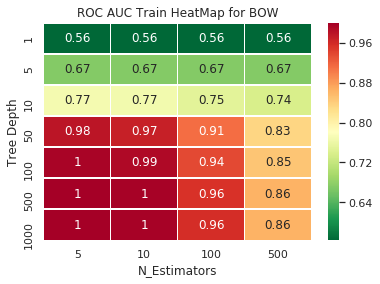

In [118]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_bow_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_bow_train, y_train)
        y_bow_roc_train = dt_bow_roc.predict_proba(x_bow_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_roc_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol.at[d,s] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC Train HeatMap for BOW'); 

100%|██████████| 7/7 [26:41<00:00, 324.36s/it]


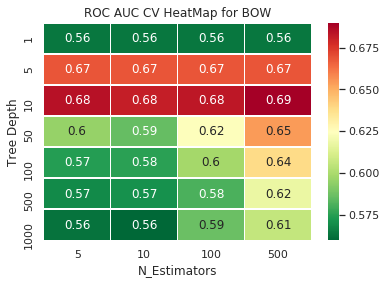

In [119]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_bow_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_bow_train, y_train)
        #dt_bow_roc.fit(x_bow_train, y_train)
        y_bow_roc_val = dt_bow_roc.predict_proba(x_bow_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_roc_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol.at[d,s] = roc_auc_val

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC CV HeatMap for BOW');   


### Conclusion:
 - Best AUC is for depth 10 and minimum sample split of 500 at 0.69

In [120]:
depth_bow = gs_result.best_params_['max_depth']
split_bow = gs_result.best_params_['min_samples_split']

In [121]:
dt_bow=DecisionTreeClassifier(max_depth=depth_bow,min_samples_split=split_bow,class_weight='balanced')
dt_bow_train=dt_bow.fit(x_bow_train,y_train)

### Plotting ROC-AUC Curve for Decision Tree

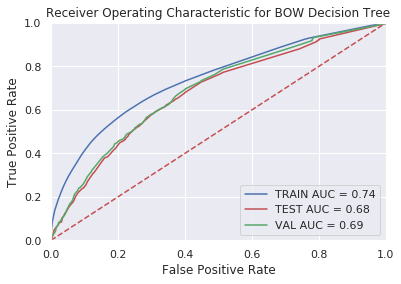

In [122]:
y_bow_prob_train = dt_bow.predict_proba(x_bow_train)
y_bow_prob_val = dt_bow.predict_proba(x_bow_val)
y_bow_prob_test = dt_bow.predict_proba(x_bow_test)

fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_bow_prob_test[:, 1])
roc_auc_bow_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for BOW Decision Tree')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_bow_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conlcusion:
 - Test AUC of 0.68 is greater than 0.5 and is a good model

<li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
</li>

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt_bow=DecisionTreeClassifier(max_depth=3,min_samples_split=100,class_weight='balanced')
dt_bow_train=dt_bow.fit(x_bow_train,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



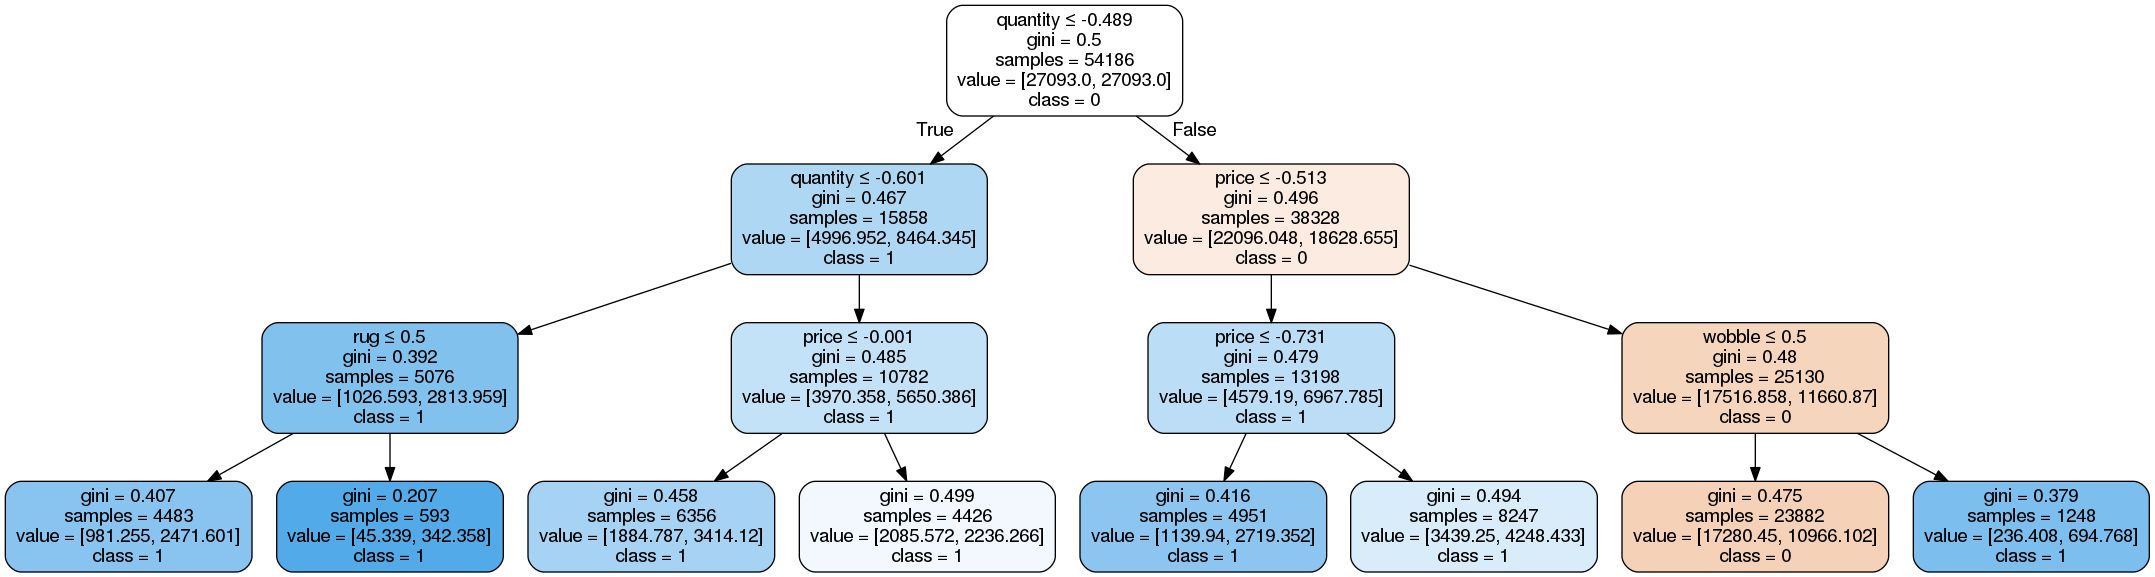

In [124]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_bow, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision.png')
Image(graph.create_png())

In [125]:
y_pred_bow_train = dt_bow.predict(x_bow_train)
y_pred_bow_val = dt_bow.predict(x_bow_val)
y_pred_bow_test = dt_bow.predict(x_bow_test)

In [126]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_bow_test = confusion_matrix(y_test, y_pred_bow_test)

TP_test = confusion_matrix_bow_test[1, 1]
TN_test = confusion_matrix_bow_test[0, 0]
FP_test = confusion_matrix_bow_test[0, 1]
FN_test = confusion_matrix_bow_test[1, 0]
TPR_test_bow= TP_test / (FN_test + TP_test)
TNR_test_bow= TN_test / (TN_test + FP_test)
FPR_test_bow= FP_test / (TN_test + FP_test)
FNR_test_bow = FN_test / (FN_test+TP_test)

confusion_matrix_bow_train = confusion_matrix(y_train, y_pred_bow_train)
TP_train = confusion_matrix_bow_train[1, 1]
TN_train = confusion_matrix_bow_train[0, 0]
FP_train = confusion_matrix_bow_train[0, 1]
FN_train = confusion_matrix_bow_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_bow_val = confusion_matrix(y_val, y_pred_bow_val)
TP_val = confusion_matrix_bow_val[1, 1]
TN_val = confusion_matrix_bow_val[0, 0]
FP_val = confusion_matrix_bow_val[0, 1]
FN_val = confusion_matrix_bow_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_bow,TNR_test_bow,FPR_test_bow,FNR_test_bow])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.5952422522915757 | 0.637819746593354  | 0.36218025340664595 | 0.40475774770842426 |
|    Test    | 0.5912961210974456 | 0.6378814047207829 |  0.362118595279217  |  0.4087038789025544 |
| Validation | 0.6026956844318041 | 0.6483739837398373 |  0.3516260162601626 | 0.39730431556819584 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion:
- Model is said to be good if value of TPR & TNR should be high and FPR & FNR should be low. 
- In our case value of TPR and TNR is high while FPR and FNR is quite high at 0.33. 

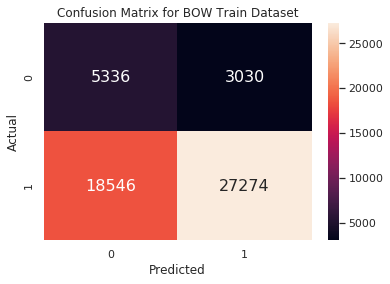

In [127]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
from sklearn.metrics import confusion_matrix
#labels = ['', 'health']
confusion_matrix_bow_train = confusion_matrix(y_train, y_pred_bow_train)

#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

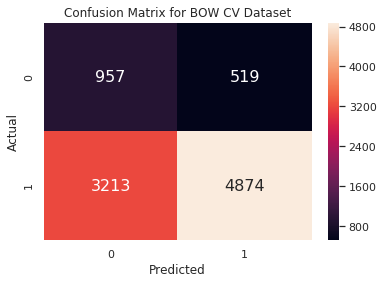

In [128]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_bow_val = confusion_matrix(y_val, y_pred_bow_val)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

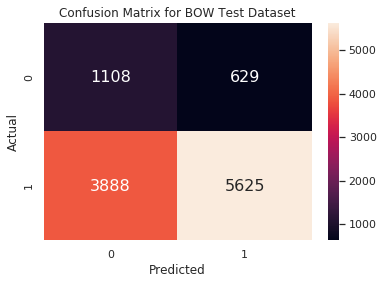

In [129]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_bow_test = confusion_matrix(y_test, y_pred_bow_test)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

<li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
            </ul>
</li>


In [130]:
false_pos=[]
x=0
for idx,item in y_test.iteritems():
    if item==0 and y_pred_bow_test[x]==1:
        false_pos.append(True)
    else:
        false_pos.append(False)
    x+=1

#wordcloud_bow_matrix

In [131]:
final_false = X_test[false_pos]
text = " ".join(essay for essay in final_false.essay)
print ("There are {} words in the combination of all essays.".format(len(text)))

There are 900010 words in the combination of all essays.


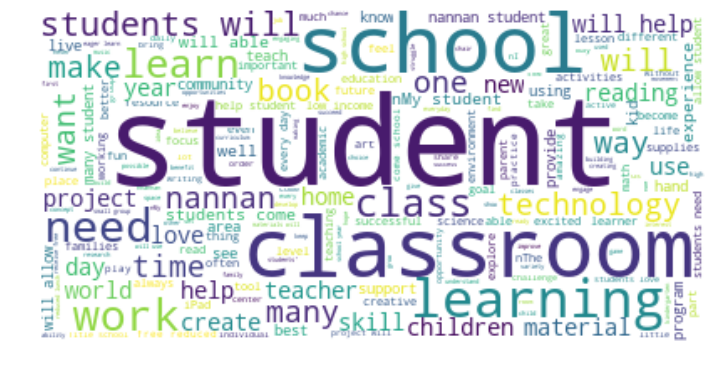

In [132]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
#http://www.learningaboutelectronics.com/Articles/How-to-set-the-size-of-a-figure-in-matplotlib-with-Python.php
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

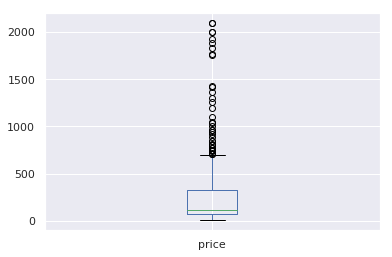

In [133]:
#box plot of price 
final_false.boxplot(column=['price'])

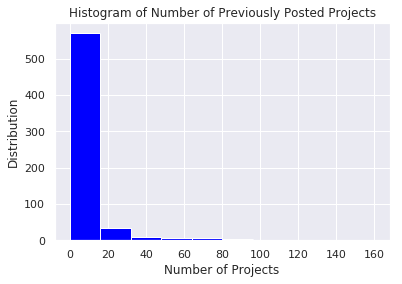

In [134]:
#Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
final_false.head(1)
plt.hist(final_false['teacher_number_of_previously_posted_projects'],color = 'blue')
# Add labels
plt.title('Histogram of Number of Previously Posted Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Distribution')
plt.show()

## 8.2 Apply Decision Tree Classifier(DecisionTreeClassifier) on categorical, numerical features + project_title(TFIDF) + preprocessed_eassay (TFIDF)

In [135]:
start_time = time.time()
grid_parms={'max_depth':depth,'min_samples_split':sample_split}
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini')

gs=GridSearchCV(dtc,grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_tfidf_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 28 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.7min finished


Best: 0.667366 using {'min_samples_split': 500, 'max_depth': 10}
Execution time: 117.5440764427185 ms


### Conclusion:
 - Best value of C(inverse of lamdha hyperparameter) is 1000 for TFIDF.

100%|██████████| 7/7 [32:15<00:00, 359.38s/it]


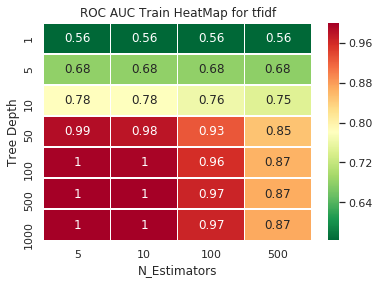

In [136]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_tfidf_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_tfidf_train, y_train)
        y_tfidf_roc_train = dt_tfidf_roc.predict_proba(x_tfidf_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_roc_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol.at[d,s] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC Train HeatMap for tfidf'); 

100%|██████████| 7/7 [29:13<00:00, 334.71s/it]


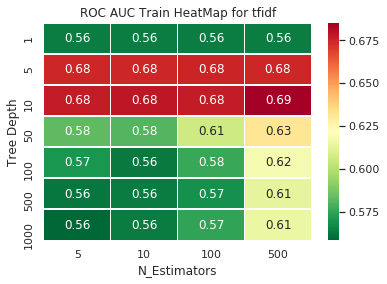

In [137]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_tfidf_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_tfidf_train, y_train)
        #dt_tfidf_roc.fit(x_tfidf_train, y_train)
        y_tfidf_roc_val = dt_tfidf_roc.predict_proba(x_tfidf_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_roc_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol.at[d,s] = roc_auc_val
    
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC Train HeatMap for tfidf'); 

In [138]:
depth_tfidf = gs_result.best_params_['max_depth']
split_tfidf = gs_result.best_params_['min_samples_split']


In [139]:
from sklearn.tree import DecisionTreeClassifier
dt_tfidf=DecisionTreeClassifier(max_depth=3,min_samples_split=100,class_weight='balanced')
dt_tfidf_train=dt_tfidf.fit(x_tfidf_train,y_train)

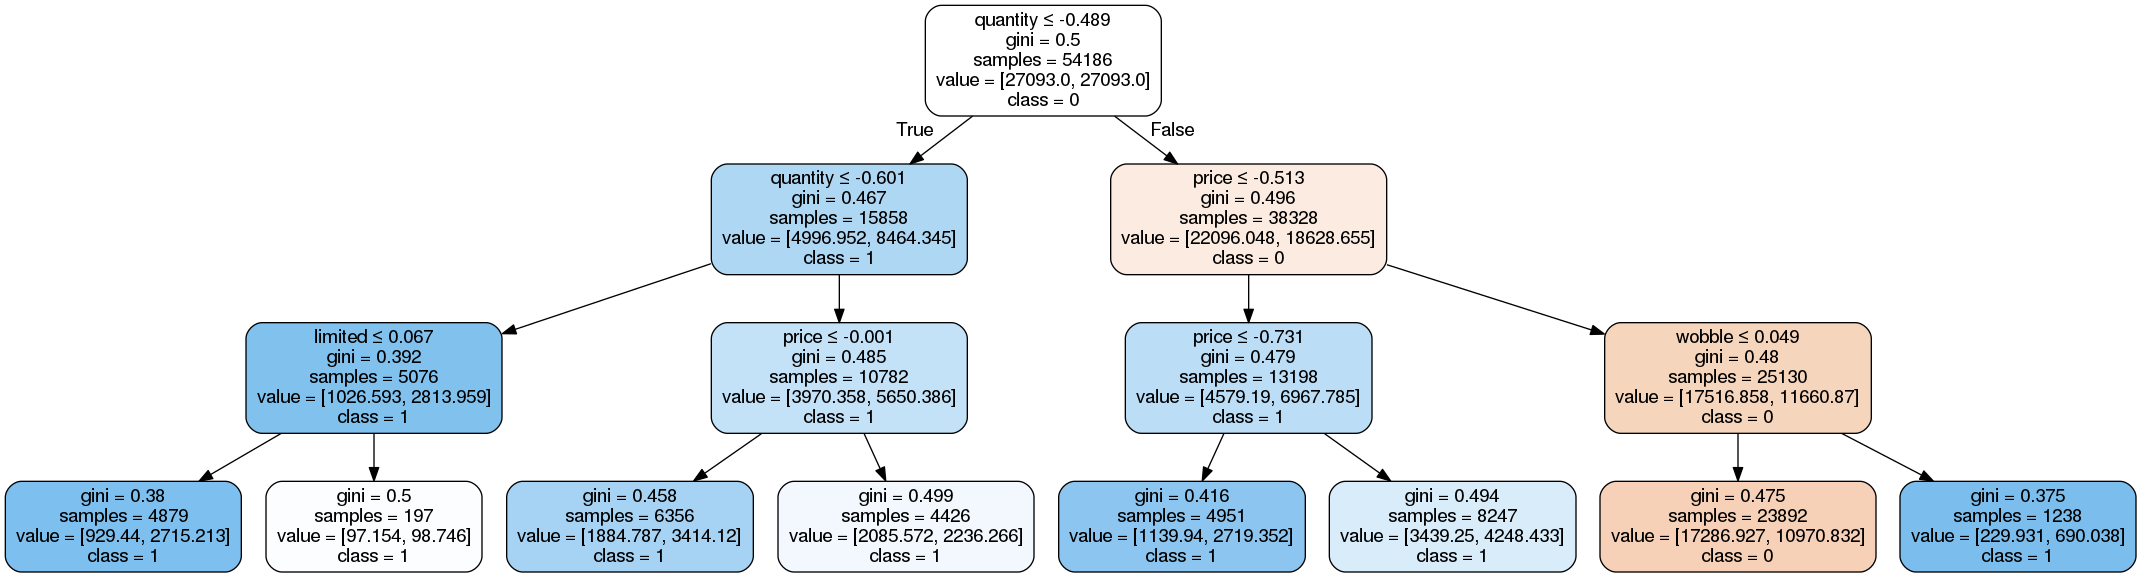

In [140]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt_tfidf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names_tfidf,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Dec.png')
Image(graph.create_png())

In [141]:
y_tfidf_prob_train = dt_tfidf.predict_proba(x_tfidf_train)
y_tfidf_prob_val = dt_tfidf.predict_proba(x_tfidf_val)
y_tfidf_prob_test = dt_tfidf.predict_proba(x_tfidf_test)

In [142]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidf_prob_test[:, 1])
roc_auc_tfidf_test = auc(fpr_test, tpr_test)


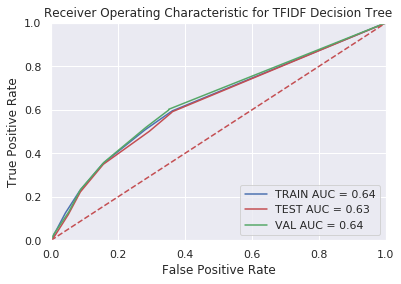

In [143]:
plt.title('Receiver Operating Characteristic for TFIDF Decision Tree')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidf_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:
 - Test and Val AUC has a value of 0.68 & 0.69 which is greater than 0.5 and hence is a good model.

In [144]:
y_pred_tfidf_train = dt_tfidf.predict(x_tfidf_train)
y_pred_tfidf_val = dt_tfidf.predict(x_tfidf_val)
y_pred_tfidf_test = dt_tfidf.predict(x_tfidf_test)

In [145]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)

TP_test = confusion_matrix_tfidf_test[1, 1]
TN_test = confusion_matrix_tfidf_test[0, 0]
FP_test = confusion_matrix_tfidf_test[0, 1]
FN_test = confusion_matrix_tfidf_test[1, 0]
TPR_test_tfidf= TP_test / (FN_test + TP_test)
TNR_test_tfidf= TN_test / (TN_test + FP_test)
FPR_test_tfidf= FP_test / (TN_test + FP_test)
FNR_test_tfidf = FN_test / (FN_test+TP_test)

confusion_matrix_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)
TP_train = confusion_matrix_tfidf_train[1, 1]
TN_train = confusion_matrix_tfidf_train[0, 0]
FP_train = confusion_matrix_tfidf_train[0, 1]
FN_train = confusion_matrix_tfidf_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidf_val = confusion_matrix(y_val, y_pred_tfidf_val)
TP_val = confusion_matrix_tfidf_val[1, 1]
TN_val = confusion_matrix_tfidf_val[0, 0]
FP_val = confusion_matrix_tfidf_val[0, 1]
FN_val = confusion_matrix_tfidf_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_tfidf,TNR_test_tfidf,FPR_test_tfidf,FNR_test_tfidf])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+--------------------+---------------------+
|    Data    |        TPR         |        TNR         |        FPR         |         FNR         |
+------------+--------------------+--------------------+--------------------+---------------------+
|   Train    | 0.595067656045395  | 0.6380588094668898 | 0.3619411905331102 |  0.404932343954605  |
|    Test    | 0.5912961210974456 | 0.6378814047207829 | 0.362118595279217  |  0.4087038789025544 |
| Validation | 0.6026956844318041 | 0.6483739837398373 | 0.3516260162601626 | 0.39730431556819584 |
+------------+--------------------+--------------------+--------------------+---------------------+


### Conclusion:
- Model is said to be good if value of TPR & TNR should be high and FPR & FNR should be low. 
- In our case value of TPR/TNR is high and FPR/FNR is high around 0.34/0.38. 

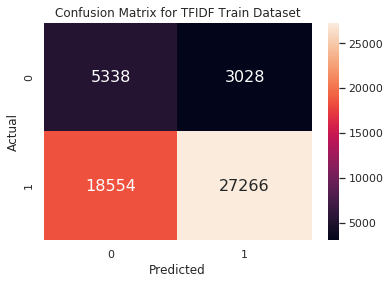

In [146]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
from sklearn.metrics import confusion_matrix
#labels = ['', 'health']
confusion_matrix_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)

#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

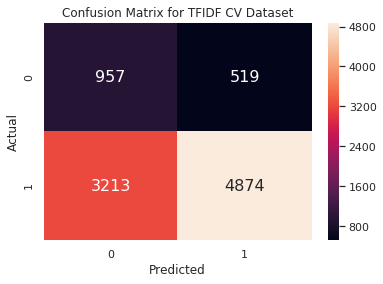

In [147]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_tfidf_val = confusion_matrix(y_val, y_pred_tfidf_val)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

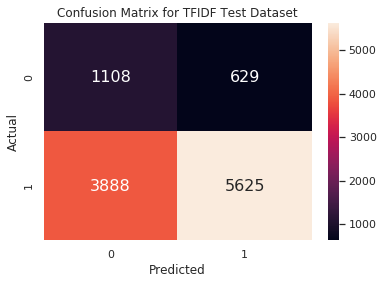

In [148]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

In [149]:
false_pos=[]
x=0
for idx,item in y_test.iteritems():
    if item==0 and y_pred_tfidf_test[x]==1:
        false_pos.append(True)
    else:
        false_pos.append(False)
    x+=1


final_false = X_test[false_pos]
text = " ".join(essay for essay in final_false.essay)
print ("There are {} words in the combination of all essays.".format(len(text)))

There are 900010 words in the combination of all essays.


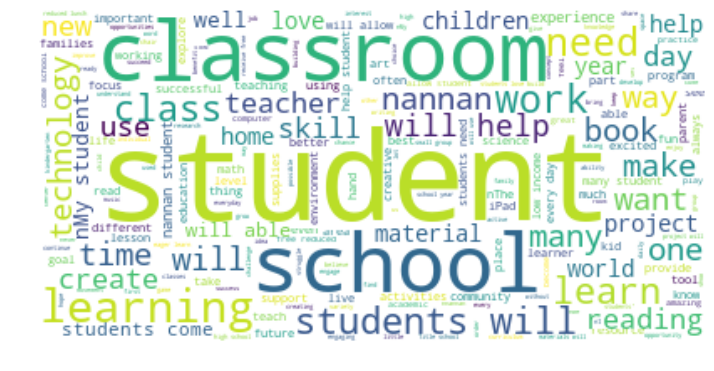

In [150]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
#http://www.learningaboutelectronics.com/Articles/How-to-set-the-size-of-a-figure-in-matplotlib-with-Python.php
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

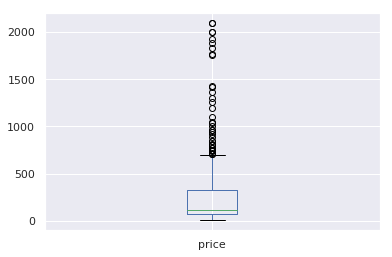

In [151]:
#box plot of price 
final_false.boxplot(column=['price'])

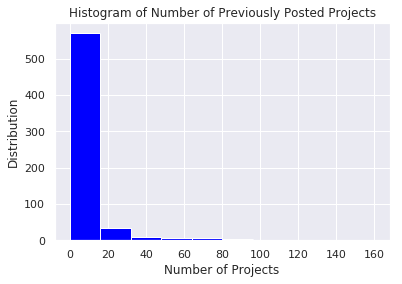

In [152]:
#Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
final_false.head(1)
plt.hist(final_false['teacher_number_of_previously_posted_projects'],color = 'blue')
# Add labels
plt.title('Histogram of Number of Previously Posted Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Distribution')
plt.show()

## Set 8.3: Apply Decision Tree Classifier(DecisionTreeClassifier) on categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [153]:
start_time = time.time()
grid_parms={'max_depth':depth,'min_samples_split':sample_split}
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini')

gs=GridSearchCV(dtc,grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_avgw2v_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Fitting 2 folds for each of 28 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  5.1min finished


Best: 0.650803 using {'min_samples_split': 500, 'max_depth': 5}
Execution time: 338.2838134765625 ms


### Conclusion:
 - Best value of C(inverse of lamdha hyperparameter) is 1000 for Average W2V.

100%|██████████| 7/7 [1:04:40<00:00, 676.39s/it]


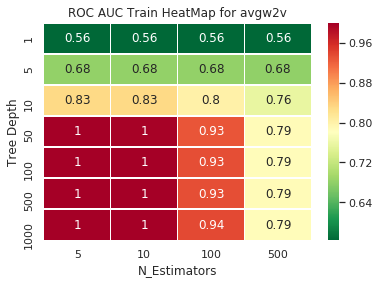

In [154]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_avgw2v_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_avgw2v_train, y_train)
        y_avgw2v_roc_train = dt_avgw2v_roc.predict_proba(x_avgw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_roc_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol.at[d,s] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC Train HeatMap for avgw2v'); 

100%|██████████| 7/7 [1:04:36<00:00, 674.00s/it]


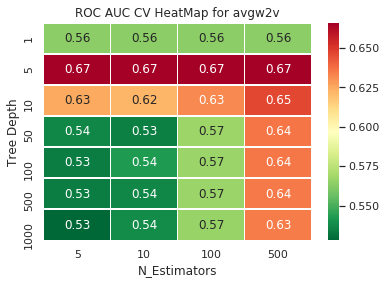

In [155]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_avgw2v_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_avgw2v_train, y_train)
        #dt_avgw2v_roc.fit(x_avgw2v_train, y_train)
        y_avgw2v_roc_val = dt_avgw2v_roc.predict_proba(x_avgw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_roc_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol.at[d,s] = roc_auc_val
    
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC CV HeatMap for avgw2v'); 

In [156]:
depth_avgw2v = gs_result.best_params_['max_depth']
split_avgw2v = gs_result.best_params_['min_samples_split']
dt_avgw2v=DecisionTreeClassifier(max_depth=depth_avgw2v,min_samples_split=split_avgw2v,class_weight='balanced')
dt_avgw2v_train=dt_avgw2v.fit(x_avgw2v_train,y_train)

In [157]:
y_avgw2v_prob_val = dt_avgw2v.predict_proba(x_avgw2v_val.toarray())
y_avgw2v_prob_test = dt_avgw2v.predict_proba(x_avgw2v_test.toarray())
y_avgw2v_prob_train = dt_avgw2v.predict_proba(x_avgw2v_train.toarray())

In [158]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_avgw2v_prob_test[:, 1])
roc_auc_avgw2v_test = auc(fpr_test, tpr_test)

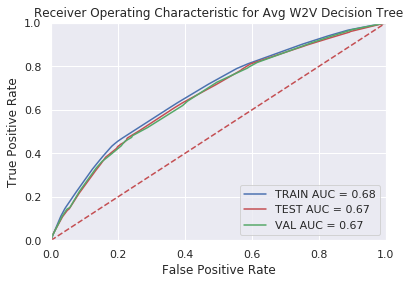

In [159]:
plt.title('Receiver Operating Characteristic for Avg W2V Decision Tree')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_avgw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:
 - Test and Val AUC has a value of 0.72 & 0.73 which is greater than 0.5 and hence is a good model.

In [160]:
y_pred_avgw2v_train = dt_avgw2v.predict(x_avgw2v_train)
y_pred_avgw2v_val = dt_avgw2v.predict(x_avgw2v_val)
y_pred_avgw2v_test = dt_avgw2v.predict(x_avgw2v_test)

In [161]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_avgw2v_test = confusion_matrix(y_test, y_pred_avgw2v_test)

TP_test = confusion_matrix_avgw2v_test[1, 1]
TN_test = confusion_matrix_avgw2v_test[0, 0]
FP_test = confusion_matrix_avgw2v_test[0, 1]
FN_test = confusion_matrix_avgw2v_test[1, 0]
TPR_test_avgw2v= TP_test / (FN_test + TP_test)
TNR_test_avgw2v= TN_test / (TN_test + FP_test)
FPR_test_avgw2v= FP_test / (TN_test + FP_test)
FNR_test_avgw2v = FN_test / (FN_test+TP_test)

confusion_matrix_avgw2v_train = confusion_matrix(y_train, y_pred_avgw2v_train)
TP_train = confusion_matrix_avgw2v_train[1, 1]
TN_train = confusion_matrix_avgw2v_train[0, 0]
FP_train = confusion_matrix_avgw2v_train[0, 1]
FN_train = confusion_matrix_avgw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_avgw2v_val = confusion_matrix(y_val, y_pred_avgw2v_val)
TP_val = confusion_matrix_avgw2v_val[1, 1]
TN_val = confusion_matrix_avgw2v_val[0, 0]
FP_val = confusion_matrix_avgw2v_val[0, 1]
FN_val = confusion_matrix_avgw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_avgw2v,TNR_test_avgw2v,FPR_test_avgw2v,FNR_test_avgw2v])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+---------------------+--------------------+---------------------+--------------------+
|    Data    |         TPR         |        TNR         |         FPR         |        FNR         |
+------------+---------------------+--------------------+---------------------+--------------------+
|   Train    |  0.4704932343954605 | 0.7865168539325843 | 0.21348314606741572 | 0.5295067656045395 |
|    Test    | 0.46662461894249974 | 0.7737478411053541 | 0.22625215889464595 | 0.5333753810575003 |
| Validation |  0.4778038827748238 | 0.758130081300813  |  0.241869918699187  | 0.5221961172251762 |
+------------+---------------------+--------------------+---------------------+--------------------+


### Conclusion:
- Model is said to be good if value of TPR & TNR should be high and FPR & FNR should be low. 
- In our case value of TPR is high while TNR is low and similarly FPR is high while FNR is low. 

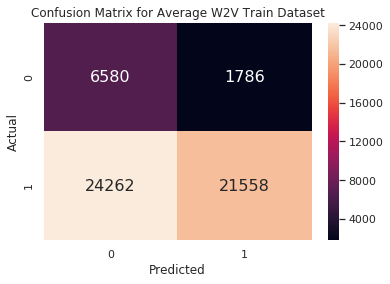

In [162]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
from sklearn.metrics import confusion_matrix
#labels = ['', 'health']
confusion_matrix_avgw2v_train = confusion_matrix(y_train, y_pred_avgw2v_train)

#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Average W2V Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

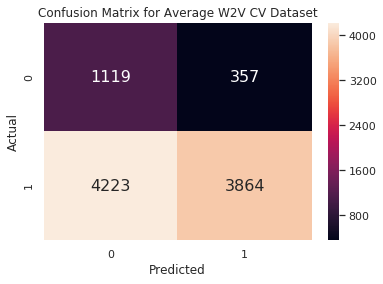

In [163]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_avgw2v_val = confusion_matrix(y_val, y_pred_avgw2v_val)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Average W2V CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

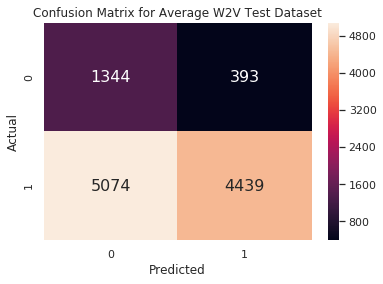

In [164]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_avgw2v_test = confusion_matrix(y_test, y_pred_avgw2v_test)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Average W2V Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

## 8.4: Apply Decision Tree Classifier(DecisionTreeClassifier) on categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [165]:
start_time = time.time()
grid_parms={'max_depth':depth,'min_samples_split':sample_split}
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini')

gs=GridSearchCV(dtc,grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_tfidfw2v_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 28 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  4.8min finished


Best: 0.652655 using {'min_samples_split': 500, 'max_depth': 5}
Execution time: 323.30708026885986 ms


### Conclusion:
 - Best value of C(inverse of lamdha hyperparameter) is 1000 for TFIDF W2V.

100%|██████████| 7/7 [1:06:35<00:00, 681.12s/it]


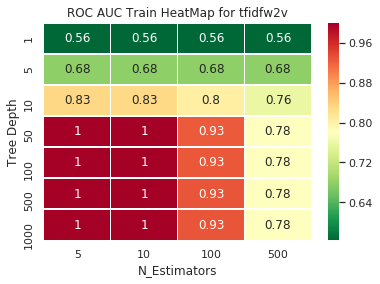

In [166]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_tfidfw2v_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_tfidfw2v_train, y_train)
        y_tfidfw2v_roc_train = dt_tfidfw2v_roc.predict_proba(x_tfidfw2v_train.toarray())
        fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_roc_train[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)
        sol.at[d,s] = roc_auc_train

#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC Train HeatMap for tfidfw2v'); 

100%|██████████| 7/7 [1:03:01<00:00, 657.91s/it]


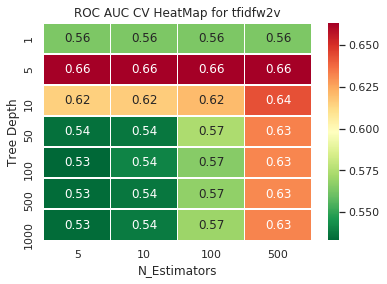

In [167]:
sol=pd.DataFrame(index=depth, columns=sample_split)

for d in tqdm(depth):
    for s in sample_split:
        dt_tfidfw2v_roc = DecisionTreeClassifier(criterion='gini',max_depth=d,
                                            min_samples_split=s,class_weight='balanced').fit(x_tfidfw2v_train, y_train)
        #dt_tfidfw2v_roc.fit(x_tfidfw2v_train, y_train)
        y_tfidfw2v_roc_val = dt_tfidfw2v_roc.predict_proba(x_tfidfw2v_val.toarray())
        fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_roc_val[:, 1])
        roc_auc_val = auc(fpr_val, tpr_val)
        sol.at[d,s] = roc_auc_val
    
#https://stackoverflow.com/questions/30485986/type-error-in-visualising-pandas-dataframe-as-heatmap
sol=sol[sol.columns].astype(float)
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(sol,  cmap='RdYlGn_r',linewidths=0.5, annot=True)# font size
#ax=sn.heatmap(sol)
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
#
# labels, title and ticks
ax.set_xlabel('N_Estimators')
ax.set_ylabel('Tree Depth'); 
ax.set_title('ROC AUC CV HeatMap for tfidfw2v'); 


In [168]:
depth_tfidfw2v = gs_result.best_params_['max_depth']
split_tfidfw2v = gs_result.best_params_['min_samples_split']
dt_tfidfw2v=DecisionTreeClassifier(max_depth=depth_tfidfw2v,min_samples_split=split_tfidfw2v,class_weight='balanced')
dt_tfidfw2v_train=dt_tfidfw2v.fit(x_tfidfw2v_train,y_train)

In [169]:
y_tfidfw2v_prob_val = dt_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
y_tfidfw2v_prob_test = dt_tfidfw2v.predict_proba(x_tfidfw2v_test.toarray())
y_tfidfw2v_prob_train = dt_tfidfw2v.predict_proba(x_tfidfw2v_train.toarray())

In [170]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidfw2v_prob_test[:, 1])
roc_auc_tfidfw2v_test = auc(fpr_test, tpr_test)

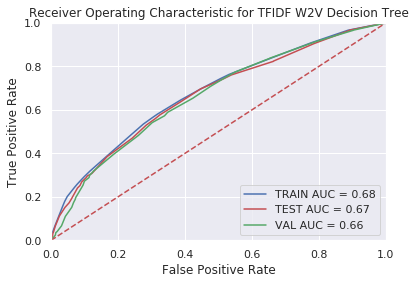

In [171]:
plt.title('Receiver Operating Characteristic for TFIDF W2V Decision Tree')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidfw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:
 - Test and Val AUC has a value of 0.67 & 0.68 which is greater than 0.5 and hence is a good model.

In [172]:
y_pred_tfidfw2v_train = dt_tfidfw2v.predict(x_tfidfw2v_train)
y_pred_tfidfw2v_val = dt_tfidfw2v.predict(x_tfidfw2v_val)
y_pred_tfidfw2v_test = dt_tfidfw2v.predict(x_tfidfw2v_test)

In [173]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidfw2v_test = confusion_matrix(y_test, y_pred_tfidfw2v_test)

TP_test = confusion_matrix_tfidfw2v_test[1, 1]
TN_test = confusion_matrix_tfidfw2v_test[0, 0]
FP_test = confusion_matrix_tfidfw2v_test[0, 1]
FN_test = confusion_matrix_tfidfw2v_test[1, 0]
TPR_test_tfidfw2v= TP_test / (FN_test + TP_test)
TNR_test_tfidfw2v= TN_test / (TN_test + FP_test)
FPR_test_tfidfw2v= FP_test / (TN_test + FP_test)
FNR_test_tfidfw2v = FN_test / (FN_test+TP_test)

confusion_matrix_tfidfw2v_train = confusion_matrix(y_train, y_pred_tfidfw2v_train)
TP_train = confusion_matrix_tfidfw2v_train[1, 1]
TN_train = confusion_matrix_tfidfw2v_train[0, 0]
FP_train = confusion_matrix_tfidfw2v_train[0, 1]
FN_train = confusion_matrix_tfidfw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidfw2v_val = confusion_matrix(y_val, y_pred_tfidfw2v_val)
TP_val = confusion_matrix_tfidfw2v_val[1, 1]
TN_val = confusion_matrix_tfidfw2v_val[0, 0]
FP_val = confusion_matrix_tfidfw2v_val[0, 1]
FN_val = confusion_matrix_tfidfw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_tfidfw2v,TNR_test_tfidfw2v,FPR_test_tfidfw2v,FNR_test_tfidfw2v])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.5804452204277608 | 0.6821659096342338 |  0.3178340903657662 |  0.4195547795722392 |
|    Test    | 0.5765794176390203 | 0.6753022452504318 | 0.32469775474956825 | 0.42342058236097974 |
| Validation | 0.5887226412761222 | 0.6517615176151762 | 0.34823848238482386 | 0.41127735872387783 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion:
- Model is said to be good if value of TPR & TNR should be high and FPR & FNR should be low. 
- In our case value of TPR & TNR are above 0.50 while FPR & FNR is also high around 0.32 and 0.42. 

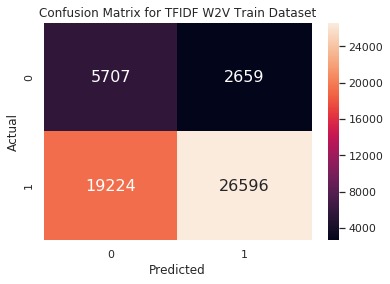

In [174]:

#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
from sklearn.metrics import confusion_matrix
#labels = ['', 'health']
confusion_matrix_tfidfw2v_train = confusion_matrix(y_train, y_pred_tfidfw2v_train)

#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF W2V Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

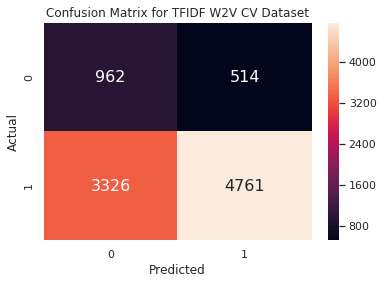

In [175]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_tfidfw2v_val = confusion_matrix(y_val, y_pred_tfidfw2v_val)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF W2V CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

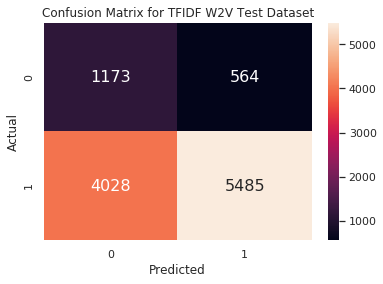

In [176]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_tfidfw2v_test = confusion_matrix(y_test, y_pred_tfidfw2v_test)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for TFIDF W2V Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

<h2>8.5 Task 2</h2>

 <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
 </ul>

In [177]:
dt_tfidf=DecisionTreeClassifier(max_depth=depth_tfidf,min_samples_split=split_tfidf,class_weight='balanced')
dt_tfidf_train=dt_tfidf.fit(x_tfidf_train,y_train)

In [178]:
feat_importance=dt_tfidf.feature_importances_
sorted_feat_imp=np.argsort(feat_importance)

In [179]:
len(feat_importance)
len(sorted_feat_imp>=5000)

14874

In [180]:
x_best_5000_trn=pd.DataFrame(x_tfidf_train.toarray())
x_best_5000_tst=pd.DataFrame(x_tfidf_test.toarray())
x_best_5000_vl=pd.DataFrame(x_tfidf_val.toarray())
print(x_best_5000_trn.shape)
print(x_best_5000_vl.shape)
print(x_best_5000_tst.shape)
x_best_5000_trn.columns=feature_names_tfidf
x_best_5000_vl.columns=feature_names_tfidf
x_best_5000_tst.columns=feature_names_tfidf

(54186, 14874)
(9563, 14874)
(11250, 14874)


In [181]:
x_best_5000_train=x_best_5000_trn.loc[:,sorted_feat_imp<=5000]
x_best_5000_val=x_best_5000_vl.loc[:,sorted_feat_imp<=5000]
x_best_5000_test=x_best_5000_tst.loc[:,sorted_feat_imp<=5000]

In [186]:
#https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv
from sklearn.linear_model import LogisticRegression

scoring = {'AUC': 'roc_auc'}

lst=[]
weight=['balanced']
input=0.000001
while input<=1000:
    lst.append(input)
    input*=10

grid_parms={'C':lst}
lgr=LogisticRegression(class_weight = 'balanced',solver='saga',penalty='l1',n_jobs=-1)
start_time = time.time()
gs=GridSearchCV(lgr,grid_parms,verbose=True,scoring = scoring,refit='AUC', 
                return_train_score=True,cv=2)
gs_result=gs.fit(x_best_5000_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  8.8min finished


Best: 0.643399 using {'C': 1.0}
Execution time: 939.2673954963684 ms


In [188]:
c_input_best_5000 = gs_result.best_params_['C']
#p_input_best_5000 = gs_result.best_params_['penalty']
#solve=gs_result.best_params_['solver']

100%|██████████| 10/10 [34:26<00:00, 357.18s/it]


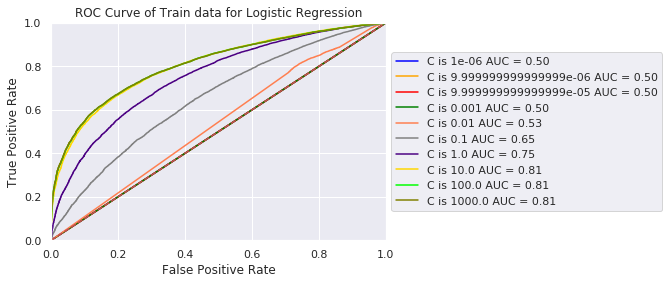

In [189]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for c_value in tqdm(lst):
    neigh_best_5000 = LogisticRegression(C=c_value,n_jobs=-1,class_weight = 'balanced',solver='saga',penalty='l1')
    neigh_best_5000.fit(x_best_5000_train, y_train)
    y_best_5000_prob_train = neigh_best_5000.predict_proba(x_best_5000_train)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_best_5000_prob_train[:, 1])
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'C is ' + str(c_value) + ' AUC = %0.2f' % roc_auc_train)
    c+=1
    
plt.title("ROC Curve of Train data for Logistic Regression")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

100%|██████████| 10/10 [33:31<00:00, 352.29s/it]


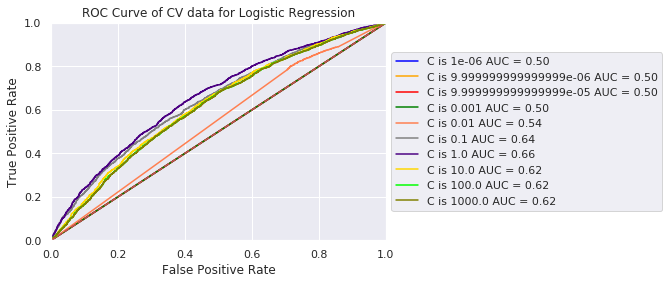

In [191]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for c_value in tqdm(lst):
    neigh_best_5000 = LogisticRegression(C=c_value,n_jobs=-1,class_weight = 'balanced',solver='saga',penalty='l1')
    neigh_best_5000.fit(x_best_5000_train, y_train)
    y_best_5000_prob_val = neigh_best_5000.predict_proba(x_best_5000_val)
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_best_5000_prob_val[:, 1])
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C is ' + str(c_value) + ' AUC = %0.2f' % roc_auc_val)
    c+=1
    
plt.title("ROC Curve of CV data for Logistic Regression")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion:
 - 

In [192]:
lr=LogisticRegression(C=c_value,n_jobs=-1,class_weight = 'balanced',solver='saga',penalty='l1')
lr_best_5000=lr.fit(x_best_5000_train,y_train)

In [193]:
y_best_5000_prob_val = lr_best_5000.predict_proba(x_best_5000_val)
y_best_5000_prob_test = lr_best_5000.predict_proba(x_best_5000_test)
y_best_5000_prob_train = lr_best_5000.predict_proba(x_best_5000_train)

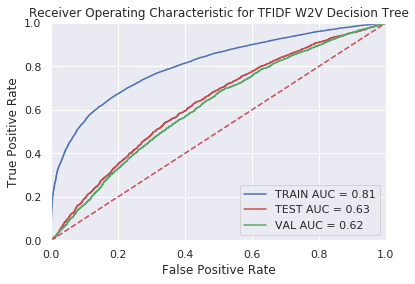

In [194]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_best_5000_prob_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_best_5000_prob_val[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_best_5000_prob_test[:, 1])
roc_auc_best_5000_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for TFIDF W2V Decision Tree')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_best_5000_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [195]:
y_pred_best_5000_train = lr_best_5000.predict(x_best_5000_train)
y_pred_best_5000_val = lr_best_5000.predict(x_best_5000_val)
y_pred_best_5000_test = lr_best_5000.predict(x_best_5000_test)

In [196]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_best_5000_test = confusion_matrix(y_test, y_pred_best_5000_test)

TP_test = confusion_matrix_best_5000_test[1, 1]
TN_test = confusion_matrix_best_5000_test[0, 0]
FP_test = confusion_matrix_best_5000_test[0, 1]
FN_test = confusion_matrix_best_5000_test[1, 0]
TPR_test_best_5000= TP_test / (FN_test + TP_test)
TNR_test_best_5000= TN_test / (TN_test + FP_test)
FPR_test_best_5000= FP_test / (TN_test + FP_test)
FNR_test_best_5000 = FN_test / (FN_test+TP_test)

confusion_matrix_best_5000_train = confusion_matrix(y_train, y_pred_best_5000_train)
TP_train = confusion_matrix_best_5000_train[1, 1]
TN_train = confusion_matrix_best_5000_train[0, 0]
FP_train = confusion_matrix_best_5000_train[0, 1]
FN_train = confusion_matrix_best_5000_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_best_5000_val = confusion_matrix(y_val, y_pred_best_5000_val)
TP_val = confusion_matrix_best_5000_val[1, 1]
TN_val = confusion_matrix_best_5000_val[0, 0]
FP_val = confusion_matrix_best_5000_val[0, 1]
FN_val = confusion_matrix_best_5000_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test_best_5000,TNR_test_best_5000,FPR_test_best_5000,FNR_test_best_5000])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.7034701003928415 | 0.7690652641644753 | 0.23093473583552473 |  0.2965298996071584 |
|    Test    | 0.655418900452013  | 0.5400115141047783 |  0.4599884858952216 |  0.344581099547987  |
| Validation | 0.6751576604426858 | 0.5040650406504065 |  0.4959349593495935 | 0.32484233955731423 |
+------------+--------------------+--------------------+---------------------+---------------------+


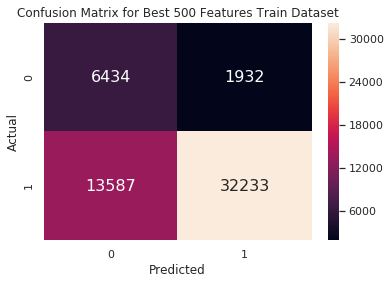

In [197]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
from sklearn.metrics import confusion_matrix
#labels = ['', 'health']
confusion_matrix_best_5000_train = confusion_matrix(y_train, y_pred_best_5000_train)

#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_best_5000_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Best 500 Features Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

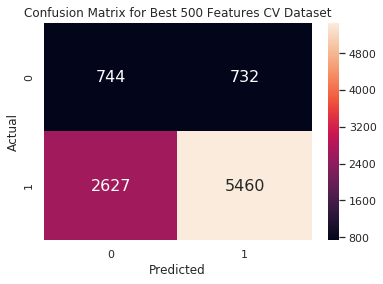

In [198]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_best_5000_val = confusion_matrix(y_val, y_pred_best_5000_val)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_best_5000_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Best 500 Features CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

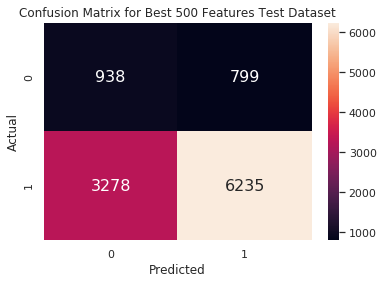

In [199]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_matrix_best_5000_test = confusion_matrix(y_test, y_pred_best_5000_test)
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_best_5000_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for Best 500 Features Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

<h1>4. Conclusions</h1>

In [200]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizor", "Split","Depth","AUC"]
x.add_row(["BOW",split_bow,depth_bow,roc_auc_bow_test])
x.add_row(["TF-IDF",split_tfidf,depth_tfidf,roc_auc_tfidf_test])
x.add_row(["Average W2V",split_avgw2v,depth_avgw2v,roc_auc_avgw2v_test])
x.add_row(["TF-IDF W2V",split_tfidfw2v,depth_tfidfw2v,roc_auc_tfidfw2v_test])
x.add_row(["BEST 5000 FEATURES","NA","C:" + str(c_input_best_5000),roc_auc_best_5000_test])
print(x)

+--------------------+-------+-------+--------------------+
|     Vectorizor     | Split | Depth |        AUC         |
+--------------------+-------+-------+--------------------+
|        BOW         |  500  |   10  | 0.6787224354564709 |
|       TF-IDF       |  500  |   10  | 0.6321538849876129 |
|    Average W2V     |  500  |   5   | 0.666332124612558  |
|     TF-IDF W2V     |  500  |   5   | 0.6684687033427154 |
| BEST 5000 FEATURES |   NA  | C:1.0 | 0.631811203297781  |
+--------------------+-------+-------+--------------------+


In [201]:
x = PrettyTable()

x.field_names = ["Vectorizor", "TPR","TNR","FPR","FNR"]
x.add_row(["BOW",TPR_test_bow,TNR_test_bow,FPR_test_bow,FNR_test_bow])
x.add_row(["TFIDF",TPR_test_tfidf,TNR_test_tfidf,FPR_test_tfidf,FNR_test_tfidf])
x.add_row(["Avergae W2V",TPR_test_avgw2v,TNR_test_avgw2v,FPR_test_avgw2v,FNR_test_avgw2v])
x.add_row(["TF-IDF W2V",TPR_test_tfidfw2v,TNR_test_tfidfw2v,FPR_test_tfidfw2v,FNR_test_tfidfw2v])
x.add_row(["Best 5000 Features",TPR_test_best_5000,TNR_test_best_5000,FPR_test_best_5000,FNR_test_best_5000])

print(x)

+--------------------+---------------------+--------------------+---------------------+---------------------+
|     Vectorizor     |         TPR         |        TNR         |         FPR         |         FNR         |
+--------------------+---------------------+--------------------+---------------------+---------------------+
|        BOW         |  0.5912961210974456 | 0.6378814047207829 |  0.362118595279217  |  0.4087038789025544 |
|       TFIDF        |  0.5912961210974456 | 0.6378814047207829 |  0.362118595279217  |  0.4087038789025544 |
|    Avergae W2V     | 0.46662461894249974 | 0.7737478411053541 | 0.22625215889464595 |  0.5333753810575003 |
|     TF-IDF W2V     |  0.5765794176390203 | 0.6753022452504318 | 0.32469775474956825 | 0.42342058236097974 |
| Best 5000 Features |  0.655418900452013  | 0.5400115141047783 |  0.4599884858952216 |  0.344581099547987  |
+--------------------+---------------------+--------------------+---------------------+---------------------+


### Conclusion:
- ROC Value for all the 5 text vectorisation techniques is above 0.50. This signifies all 5 models are performing well.
- AUC forBOW with minimum split of 500 and depth of 10 is the highest. Same results are specified in the TPN/TNR rations.
- Hence Average W2V vectorized model is the best model. 